# Mileston Project 1: Food Vision Big

In [1]:
# Check GPU
!nvidia-smi -L

GPU 0: NVIDIA GeForce 840M (UUID: GPU-06d1136b-0e8c-cbce-53ec-b0b0d72f3eac)


In [2]:
# Download helper functions script and import it
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


In [3]:
from helper_functions import unzip_data,create_tensorboard_callback, plot_loss_curves, compare_historys


2024-08-31 14:25:17.699205: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 14:25:17.903627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 14:25:17.961787: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-31 14:25:18.406335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-31 14:25:20.658290: W tensorflow/compiler/tf2

## Use TensorFlow DataSets to download data (TFDS)



In [1]:
# Get TensotFlow Datasets
import  tensorflow_datasets as tfds

In [2]:
# List all available datasets
datasets_list= tfds.list_builders()
'food101' in datasets_list

2024-09-01 11:17:42.245049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 11:17:42.455103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 11:17:42.515036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 11:17:42.914112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-01 11:17:50.530445: W tensorflow/compiler/tf2

True

In [3]:
# Load in the food101 dataset
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                             as_supervised=True, # data gets returned in tuple format (data, label)
                                             shuffle_files=True,
                                             with_info=True)

2024-09-01 11:17:54.290651: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Exploring the Food101 data from TensorFlow Datasets
To become one with our data, we want to find:

- Class names
- The shape of our input data (image tensors)
- The datatype of our input data
- What the labels look like (e.g. are they one-hot encoded or are they label encoded)
- Do the labels match up with the class names?

In [7]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_dir='/home/mohammad-hossein-abedi/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
       

In [8]:
# Features of Food101 from TFDS
ds_info.features
     

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [9]:
ds_info.features['label']

ClassLabel(shape=(), dtype=int64, num_classes=101)

In [10]:
# Get the class names
class_names= ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [11]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
len(train_data)

75750

In [13]:
# Take one sample of tain data
train_one_sample= train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [14]:
# Output info about aour training sample
for image, label in train_one_sample:
    print(f'''
          Image shape: {image.shape}
          Image type: {type(image)}
          Image datatype: {image.dtype}
          Target class from Food101 (tensor form): {label}
          Class name (str form): {class_names[label.numpy()]}
          ''')


          Image shape: (512, 512, 3)
          Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>
          Image datatype: <dtype: 'uint8'>
          Target class from Food101 (tensor form): 16
          Class name (str form): cheesecake
          


2024-08-31 14:25:37.751895: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
# What doed our image tensor look loke?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  84,  92],
        [ 86,  85,  93],
        [ 93,  92, 100],
        ...,
        [120, 196, 245],
        [120, 198, 246],
        [121, 199, 247]],

       [[ 88,  88,  96],
        [ 82,  82,  90],
        [ 88,  88,  96],
        ...,
        [116, 192, 244],
        [118, 195, 249],
        [119, 196, 248]],

       [[ 77,  80,  89],
        [ 75,  78,  87],
        [ 82,  86,  95],
        ...,
        [115, 189, 252],
        [117, 192, 255],
        [118, 194, 255]],

       ...,

       [[159, 166, 194],
        [154, 161, 187],
        [171, 178, 204],
        ...,
        [219, 216, 235],
        [223, 220, 239],
        [227, 226, 244]],

       [[170, 179, 208],
        [169, 179, 206],
        [173, 183, 210],
        ...,
        [218, 217, 235],
        [223, 222, 240],
        [226, 227, 245]],

       [[168, 177, 206],
        [170, 179, 208],
        [152, 162, 189],
        ...,
        [224, 223, 24

In [16]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [17]:
label.numpy()

16

In [18]:
import tensorflow as tf

In [19]:
# What are the min and max values of our image tensor?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow Datasets

Text(0.5, 1.0, 'cheesecake')

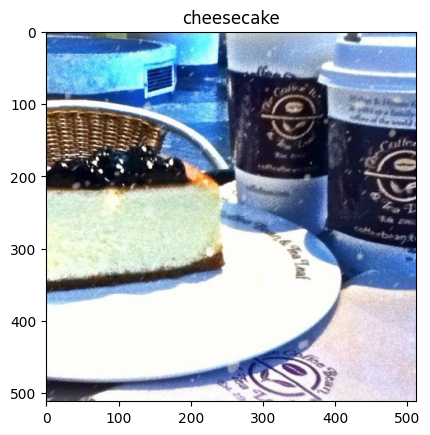

In [20]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label])

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g. batched, normalized, etc).

However, not all data (including data from from TensorFlow Datasets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:

- In `uint8` datatype
- Comprised of all different size tensors (different sized images)
- Not scaled (the pixel values are between 0 & 255)

What we know models like:

- Data in `float32` dtype (or for mixed precision `float16` and `float32`)
- For batches, TensorFlow likes all of the tensors within a batch to be of the same size
- Scaled (values between 0 & 1) also called normalized tensors generally perform better

With these points in mind, we've got a few things we can tackle with a preprocessing function.

Since we're going to be using an EfficientNetBX pretrained model from tf.keras.applications we don't need to rescale our data (these architectures have rescaling built-in).

This means our functions needs to:

- Reshape our images to all the same size
- Convert the dtype of our image tensors from `uint8` to `float32`

In [4]:
# Create a function for preprocessing images
def preprocess_image(image, label, shape=(224,224)):
    image= tf.image.resize(image, shape)
    # image = image/255. # scale image values (not required with EfficientNetBX models from tf.keras.applications)
    return tf.cast(image, tf.float32), label # return (float32 image, label) tuple

In [22]:
preprocessed_image= preprocess_image(image, label)[0]

In [23]:
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n{preprocessed_image[:2]}...,\nShape: {preprocessed_image.shape},\nDatatype: {preprocessed_image.dtype}")
     

Image before preprocessing:
 [[[ 85  84  92]
  [ 86  85  93]
  [ 93  92 100]
  ...
  [120 196 245]
  [120 198 246]
  [121 199 247]]

 [[ 88  88  96]
  [ 82  82  90]
  [ 88  88  96]
  ...
  [116 192 244]
  [118 195 249]
  [119 196 248]]]..., 
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
[[[ 84.67857   84.321434  92.321434]
  [ 87.19898   86.841835  94.841835]
  [ 84.72959   84.581635  94.72449 ]
  ...
  [119.50503  194.93877  245.85202 ]
  [114.974525 190.97452  241.90309 ]
  [119.071465 196.4286   247.82652 ]]

 [[ 75.647964  84.21939   93.21939 ]
  [ 71.45407   80.959175  89.959175]
  [ 78.03061   87.20408   97.47449 ]
  ...
  [113.31632  182.62755  249.35715 ]
  [106.57655  176.86227  245.4337  ]
  [108.601944 179.9796   248.16833 ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


## Batch and prepare datasets

We're now going to make our data input pipeline run really fast.

For more resources on this, I'd highly recommand going through the following guide: https://www.tensorflow.org/guide/data_performance

In [24]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [25]:
len(train_data)

75750

In [6]:
import tensorflow as tf

# Map preprocessing function to training data (and parallelize)
train_data= train_data.map(map_func= preprocess_image, num_parallel_calls= tf.data.AUTOTUNE)

# Shuffle train data and turn it into batches and prefetch it (load it faster)
train_data= train_data.shuffle(buffer_size= 1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data= test_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE) #.cach()

In [27]:
train_data.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=2368>

In [28]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

>"Hey, TensorFlow, map this preprocessing function (`preprocess_img`) across our training dataset, then shuffle a number of elements and then batch them together and finally make sure you prepare new batches (prefetch) whilst the model is looking through (finding patterns) the current batch."



## Create modeling callbacks

We're going to create a couple of callbacks to help us while our model trains:

TensorBoard callback to log training results (so we can visualize them later if need be)
ModelCheckpoint callback to save our model's progress after feature extraction

In [22]:
# Create tensorboard callback
from helper_functions import create_tensorboard_callback

# Create model checkpoint
checkpoint_path='model_checkpoints/feature_extraction.weights.h5'
model_checkpoint= tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                    monitor='val_loss',
                                                    save_best_only=True,
                                                    save_weights_only=True,
                                                    verbose=0)

## Setup mixed precision training

First and foremost, for a deeper understanding of mixed precision training, check out the TensorFlow guide for mixed precision: https://www.tensorflow.org/guide/mixed_precision

Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance.

In [29]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision 

mixed_precision.set_global_policy('mixed_float16') # set global data policy to mixed precision

In [30]:
mixed_precision.dtype_policy(), mixed_precision.global_policy(), mixed_precision.DTypePolicy()

(<DTypePolicy "mixed_float16">,
 <DTypePolicy "mixed_float16">,
 <DTypePolicy "mixed_float16">)

## Build feature extraction model

In [100]:
# Create base model
base_model= tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Create functional model
inputs=tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# Note: EfficientNetBX models have rescaling built-in but if your model doesn't you can have a layer like below
# x = tf.keras.layers.Rescaling(1./255)(inputs)
x= base_model(inputs, training=False) # makes sure layers which should be in inference mode only stay like that
x= tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
x= tf.keras.layers.Dense(len(class_names))(x)
outputs= tf.keras.layers.Activation('softmax', dtype=tf.float32, name='softmax_float32')(x)
model= tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])



In [101]:
len(class_names)

101

In [102]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=49>

In [103]:
model

<Functional name=functional, built=True>

In [104]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling, built=True>,
 <Dense name=dense, built=True>,
 <Activation name=softmax_float32, built=True>]

In [105]:
model.layers[1].layers

[<InputLayer name=input_layer, built=True>,
 <Rescaling name=rescaling, built=True>,
 <Normalization name=normalization, built=True>,
 <Rescaling name=rescaling_1, built=True>,
 <ZeroPadding2D name=stem_conv_pad, built=True>,
 <Conv2D name=stem_conv, built=True>,
 <BatchNormalization name=stem_bn, built=True>,
 <Activation name=stem_activation, built=True>,
 <DepthwiseConv2D name=block1a_dwconv, built=True>,
 <BatchNormalization name=block1a_bn, built=True>,
 <Activation name=block1a_activation, built=True>,
 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>,
 <Reshape name=block1a_se_reshape, built=True>,
 <Conv2D name=block1a_se_reduce, built=True>,
 <Conv2D name=block1a_se_expand, built=True>,
 <Multiply name=block1a_se_excite, built=True>,
 <Conv2D name=block1a_project_conv, built=True>,
 <BatchNormalization name=block1a_project_bn, built=True>,
 <Conv2D name=block2a_expand_conv, built=True>,
 <BatchNormalization name=block2a_expand_bn, built=True>,
 <Activation name=blo

In [106]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling          │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

## Checking layer dtype policies (are we using mixed precision?)


In [39]:
for layer in model.layers:
    print (layer.name, '\t', layer.trainable, '\t', layer.dtype, '\t', layer.dtype_policy)

input_layer 	 True 	 float32 	 <DTypePolicy "mixed_float16">
efficientnetb0 	 False 	 float32 	 <DTypePolicy "mixed_float16">
global_average_pooling 	 True 	 float32 	 <DTypePolicy "mixed_float16">
dense 	 True 	 float32 	 <DTypePolicy "mixed_float16">
softmax_float32 	 True 	 float32 	 <DTypePolicy "float32">


* `layer.name`: the human readable name of a particular layer
* `layer.trainable`: is the layer trainable or not? (if False, the weights are frozen)
* `layer.dtype`: the data type a layer stores its variables in
* `layer.dtype_policy`: the data type policy a layer computes on its variables with
>🔑 Note: A layer can have a dtype of `float32` and a dtype policy of `"mixed_float16"` because it stores its variables (weights & biases) in `float32` (more numerically stable), however it computes in `float16` (faster).

In [40]:
for layer in model.layers[1].layers[:10]:
    print (layer.name, '\t', layer.trainable, '\t', layer.dtype, '\t', layer.dtype_policy)

input_layer 	 False 	 float32 	 <DTypePolicy "mixed_float16">
rescaling 	 False 	 float32 	 <DTypePolicy "mixed_float16">
normalization 	 False 	 float32 	 <DTypePolicy "mixed_float16">
rescaling_1 	 False 	 float32 	 <DTypePolicy "mixed_float16">
stem_conv_pad 	 False 	 float32 	 <DTypePolicy "mixed_float16">
stem_conv 	 False 	 float32 	 <DTypePolicy "mixed_float16">
stem_bn 	 False 	 float32 	 <DTypePolicy "mixed_float16">
stem_activation 	 False 	 float32 	 <DTypePolicy "mixed_float16">
block1a_dwconv 	 False 	 float32 	 <DTypePolicy "mixed_float16">
block1a_bn 	 False 	 float32 	 <DTypePolicy "mixed_float16">


In [41]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model
history_feature_extraction= model.fit(train_data,
                                     epochs= 3,
                                     validation_data= test_data,
                                     validation_steps= int(0.15 * len(test_data)),
                                     callbacks=[create_tensorboard_callback(dir_name='tensorboard_logs',
                                                                           experiment_name='feature_extraction_model'),
                                               model_checkpoint])

Saving TensorBoard log files to: tensorboard_logs/feature_extraction_model/20240829-200157
Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 12273s 5s/step - accuracy: 0.4376 - loss: 2.4532 - val_accuracy: 0.6531 - val_loss: 1.3098
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 12362s 5s/step - accuracy: 0.6276 - loss: 1.4557 - val_accuracy: 0.6732 - val_loss: 1.2144
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 12353s 5s/step - accuracy: 0.6645 - loss: 1.3005 - val_accuracy: 0.6827 - val_loss: 1.1367


In [42]:
tf.get_logger()

<Logger tensorflow (ERROR)>

In [43]:
tf.get_logger().setLevel('ERROR')

In [44]:
tf.get_logger()

<Logger tensorflow (ERROR)>

In [45]:
model_results= model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 4179s 5s/step - accuracy: 0.6919 - loss: 1.1487


[1.1416871547698975, 0.6952078938484192]

## Evaluating model and mixed precision

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(history_feature_extraction)

In [49]:
model.save('saved_models/feature_extraction_model.keras')

In [50]:
model.save('saved_models/feature_extraction_model.h5')

In [31]:
import tensorflow as tf


In [32]:
saved_model= tf.keras.models.load_model('saved_models/feature_extraction_model.keras')

In [ ]:
saved_model_results= saved_model.evaluate(test_data)

In [34]:
for layer in saved_model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <DTypePolicy "mixed_float16">
efficientnetb0 False float32 <DTypePolicy "mixed_float16">
global_average_pooling True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [35]:
for layer in saved_model.layers[1].layers[:10]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <DTypePolicy "mixed_float16">
rescaling False float32 <DTypePolicy "mixed_float16">
normalization False float32 <DTypePolicy "mixed_float16">
rescaling_1 False float32 <DTypePolicy "mixed_float16">
stem_conv_pad False float32 <DTypePolicy "mixed_float16">
stem_conv False float32 <DTypePolicy "mixed_float16">
stem_bn False float32 <DTypePolicy "mixed_float16">
stem_activation False float32 <DTypePolicy "mixed_float16">
block1a_dwconv False float32 <DTypePolicy "mixed_float16">
block1a_bn False float32 <DTypePolicy "mixed_float16">


In [36]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision 

mixed_precision.set_global_policy('mixed_float16') # set global data policy to mixed precision
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

## Preparing model for Fine-tuning with frozen all layers of base model

In [11]:
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "model_checkpoints/fine_tune_checkpoints.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      monitor="val_loss")

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)


In [14]:
# Create base model
base_model= tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Create functional model
inputs=tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# Note: EfficientNetBX models have rescaling built-in but if your model doesn't you can have a layer like below
# x = tf.keras.layers.Rescaling(1./255)(inputs)
x= base_model(inputs, training=False) # makes sure layers which should be in inference mode only stay like that
x= tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
x= tf.keras.layers.Dense(101)(x)
outputs= tf.keras.layers.Activation('softmax', dtype=tf.float32, name='softmax_float32')(x)
saved_model= tf.keras.Model(inputs, outputs)

# Compile the model
saved_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                    optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                    metrics=["accuracy"])

In [ ]:
# Start to fine-tune (all layers)
history_fine_tune = saved_model.fit(train_data,
                                    epochs=100, # fine-tune for a maximum of 100 epochs
                                    #steps_per_epoch=len(train_data),
                                    validation_data=test_data,
                                    validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                    callbacks=[create_tensorboard_callback("tensorboard_logs", "fine_tuned_model"), # track the model training logs
                                              model_checkpoint, # save only the best model during training
                                              early_stopping, # stop model after X epochs of no improvements
                                              reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: tensorboard_logs/fine_tuned_model/20240831-142651
Epoch 1/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 12736s 5s/step - accuracy: 0.2137 - loss: 3.8051 - val_accuracy: 0.5339 - val_loss: 2.2453 - learning_rate: 1.0000e-04
Epoch 2/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 12348s 5s/step - accuracy: 0.4986 - loss: 2.3076 - val_accuracy: 0.5858 - val_loss: 1.7993 - learning_rate: 1.0000e-04
Epoch 3/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 12354s 5s/step - accuracy: 0.5489 - loss: 1.9404 - val_accuracy: 0.6123 - val_loss: 1.5937 - learning_rate: 1.0000e-04
Epoch 4/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 12325s 5s/step - accuracy: 0.5723 - loss: 1.7814 - val_accuracy: 0.6369 - val_loss: 1.4817 - learning_rate: 1.0000e-04
Epoch 5/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 12305s 5s/step - accuracy: 0.5928 - loss: 1.6695 - val_accuracy: 0.6417 - val_loss: 1.4214 - learning_rate: 1.0000e-04
Epoch 6/100
1548/2368 ━━━━━━━━━━━━━━━━━━━━ 1:10:54 5s/step - accuracy: 0.6081 - loss: 1.5979

In [13]:
saved_model= tf.keras.models.load_model('model_checkpoints/fine_tune_checkpoints.keras')

In [15]:
# Create base model
base_model= tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Create functional model
inputs=tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# Note: EfficientNetBX models have rescaling built-in but if your model doesn't you can have a layer like below
# x = tf.keras.layers.Rescaling(1./255)(inputs)
x= base_model(inputs, training=False) # makes sure layers which should be in inference mode only stay like that
x= tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
x= tf.keras.layers.Dense(101)(x)
outputs= tf.keras.layers.Activation('softmax', dtype=tf.float32, name='softmax_float32')(x)
saved_model= tf.keras.Model(inputs, outputs)

# Compile the model
saved_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                    optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                    metrics=["accuracy"])

In [16]:
# Start to fine-tune (all layers)
history_fine_tune = saved_model.fit(train_data,
                                    epochs=100, # fine-tune for a maximum of 100 epochs
                                    #steps_per_epoch=len(train_data),
                                    validation_data=test_data,
                                    validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                    callbacks=[create_tensorboard_callback("tensorboard_logs", "fine_tuned_model"), # track the model training logs
                                              model_checkpoint, # save only the best model during training
                                              early_stopping, # stop model after X epochs of no improvements
                                              reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: tensorboard_logs/fine_tuned_model/20240901-112335
Epoch 1/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3645s 2s/step - accuracy: 0.2202 - loss: 3.7847 - val_accuracy: 0.5215 - val_loss: 2.2383 - learning_rate: 1.0000e-04
Epoch 2/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3409s 1s/step - accuracy: 0.4981 - loss: 2.2964 - val_accuracy: 0.5898 - val_loss: 1.7908 - learning_rate: 1.0000e-04
Epoch 3/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3469s 1s/step - accuracy: 0.5437 - loss: 1.9484 - val_accuracy: 0.6102 - val_loss: 1.5974 - learning_rate: 1.0000e-04
Epoch 4/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3471s 1s/step - accuracy: 0.5733 - loss: 1.7738 - val_accuracy: 0.6390 - val_loss: 1.4686 - learning_rate: 1.0000e-04
Epoch 5/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3407s 1s/step - accuracy: 0.5915 - loss: 1.6748 - val_accuracy: 0.6412 - val_loss: 1.4231 - learning_rate: 1.0000e-04
Epoch 6/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3375s 1s/step - accuracy: 0.6048 - loss: 1.5981 - val_accuracy: 0.662

2024-09-01 18:06:42.270566: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3410s 1s/step - accuracy: 0.6220 - loss: 1.5325 - val_accuracy: 0.6642 - val_loss: 1.3572 - learning_rate: 1.0000e-04
Epoch 8/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3755s 2s/step - accuracy: 0.6311 - loss: 1.4840 - val_accuracy: 0.6621 - val_loss: 1.2924 - learning_rate: 1.0000e-04
Epoch 9/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3753s 2s/step - accuracy: 0.6355 - loss: 1.4542 - val_accuracy: 0.6666 - val_loss: 1.2836 - learning_rate: 1.0000e-04
Epoch 10/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3603s 2s/step - accuracy: 0.6466 - loss: 1.4199 - val_accuracy: 0.6732 - val_loss: 1.2500 - learning_rate: 1.0000e-04
Epoch 11/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3414s 1s/step - accuracy: 0.6496 - loss: 1.3912 - val_accuracy: 0.6870 - val_loss: 1.2173 - learning_rate: 1.0000e-04
Epoch 12/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3399s 1s/step - accuracy: 0.6579 - loss: 1.3595 - val_accuracy: 0.6846 - val_loss: 1.2086 - learning_rate: 1.0000e-04
Epoch 13/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━

2024-09-02 00:53:29.323385: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3061s 1s/step - accuracy: 0.6726 - loss: 1.2890 - val_accuracy: 0.6894 - val_loss: 1.1842 - learning_rate: 1.0000e-04
Epoch 16/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3155s 1s/step - accuracy: 0.6758 - loss: 1.2768 - val_accuracy: 0.6872 - val_loss: 1.1792 - learning_rate: 1.0000e-04
Epoch 17/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3121s 1s/step - accuracy: 0.6811 - loss: 1.2604 - val_accuracy: 0.6904 - val_loss: 1.1583 - learning_rate: 1.0000e-04
Epoch 18/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3163s 1s/step - accuracy: 0.6845 - loss: 1.2451 - val_accuracy: 0.7013 - val_loss: 1.1352 - learning_rate: 1.0000e-04
Epoch 19/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3099s 1s/step - accuracy: 0.6873 - loss: 1.2340 - val_accuracy: 0.7010 - val_loss: 1.1428 - learning_rate: 1.0000e-04
Epoch 20/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 3172s 1s/step - accuracy: 0.6929 - loss: 1.2141 - val_accuracy: 0.7005 - val_loss: 1.1302 - learning_rate: 1.0000e-04
Epoch 21/100
2368/2368 ━━━━━━━━━━━━━━━━━━

In [22]:
results_fine_tune_frozen_base_model =saved_model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 1082s 1s/step - accuracy: 0.0069 - loss: 4.7411


In [23]:
from helper_functions import plot_loss_curves, compare_historys

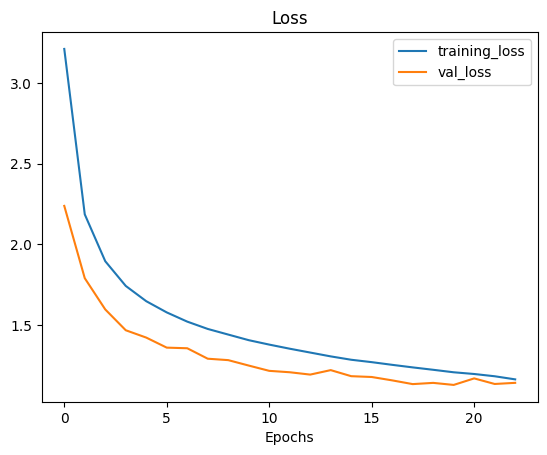

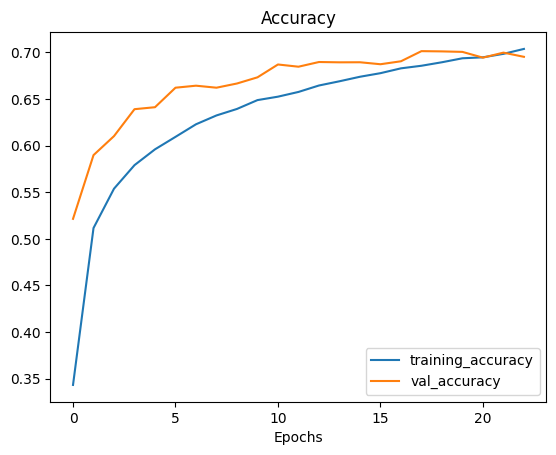

In [24]:
plot_loss_curves(history_fine_tune)

In [20]:
saved_model.save('saved_models/fine_tune_frozen_base_model.keras')

 ## Preparing model for Fine-tuning with unfrozen all layers of base model

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision 

mixed_precision.set_global_policy('mixed_float16') # set global data policy to mixed precision
mixed_precision.global_policy()

In [26]:
saved_model_2= tf.keras.models.load_model('saved_models/feature_extraction_model.keras')

In [27]:
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "model_checkpoints/fine_tune_unfrozen_base_model_checkpoints.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      monitor="val_loss")

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)


In [29]:
for layer in saved_model_2.layers:
    layer.trainable=True
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <DTypePolicy "float32">
efficientnetb0 True float32 <DTypePolicy "float32">
global_average_pooling True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [32]:
for layer in saved_model_2.layers[1].layers[:20]:
        print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <DTypePolicy "float32">
rescaling True float32 <DTypePolicy "mixed_float16">
normalization True float32 <DTypePolicy "mixed_float16">
rescaling_1 True float32 <DTypePolicy "mixed_float16">
stem_conv_pad True float32 <DTypePolicy "mixed_float16">
stem_conv True float32 <DTypePolicy "mixed_float16">
stem_bn True float32 <DTypePolicy "mixed_float16">
stem_activation True float32 <DTypePolicy "mixed_float16">
block1a_dwconv True float32 <DTypePolicy "mixed_float16">
block1a_bn True float32 <DTypePolicy "mixed_float16">
block1a_activation True float32 <DTypePolicy "mixed_float16">
block1a_se_squeeze True float32 <DTypePolicy "mixed_float16">
block1a_se_reshape True float32 <DTypePolicy "mixed_float16">
block1a_se_reduce True float32 <DTypePolicy "mixed_float16">
block1a_se_expand True float32 <DTypePolicy "mixed_float16">
block1a_se_excite True float32 <DTypePolicy "mixed_float16">
block1a_project_conv True float32 <DTypePolicy "mixed_float16">
block1a_project_bn Tr

In [33]:
a=0
for layer in saved_model_2.layers[1].layers:
    if layer.trainable==True:
        a+=1
        
a

238

In [34]:
# Compile the model
saved_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                    optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                    metrics=["accuracy"])

In [35]:
# Start to fine-tune (all layers)
history_fine_tune_unfrozen_base_model = saved_model.fit(train_data,
                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                        #steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                        callbacks=[create_tensorboard_callback("tensorboard_logs", "fine_tuned_model_unfrozen_base_model"), # track the model training logs
                                                  model_checkpoint, # save only the best model during training
                                                  early_stopping, # stop model after X epochs of no improvements
                                                  reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: tensorboard_logs/fine_tuned_model_unfrozen_base_model/20240902-101122
Epoch 1/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 14938s 6s/step - accuracy: 0.3664 - loss: 2.8560 - val_accuracy: 0.7717 - val_loss: 0.8625 - learning_rate: 1.0000e-04
Epoch 2/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 14775s 6s/step - accuracy: 0.7172 - loss: 1.0850 - val_accuracy: 0.8133 - val_loss: 0.6909 - learning_rate: 1.0000e-04
Epoch 3/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 15041s 6s/step - accuracy: 0.7936 - loss: 0.7723 - val_accuracy: 0.8252 - val_loss: 0.6349 - learning_rate: 1.0000e-04
Epoch 4/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 14270s 6s/step - accuracy: 0.8418 - loss: 0.5839 - val_accuracy: 0.8292 - val_loss: 0.6081 - learning_rate: 1.0000e-04
Epoch 5/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 14219s 6s/step - accuracy: 0.8791 - loss: 0.4391 - val_accuracy: 0.8310 - val_loss: 0.6175 - learning_rate: 1.0000e-04
Epoch 6/100
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9061 - loss: 0.3404

2024-09-03 14:27:38.980600: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 14349s 6s/step - accuracy: 0.9381 - loss: 0.2331 - val_accuracy: 0.8265 - val_loss: 0.6347 - learning_rate: 2.0000e-05


/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [43]:
for layer in saved_model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <DTypePolicy "float32">
efficientnetb0 True float32 <DTypePolicy "float32">
global_average_pooling True float32 <DTypePolicy "float32">
dense_4 True float32 <DTypePolicy "float32">
softmax_float32 True float32 <DTypePolicy "float32">


In [45]:
for layer in saved_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer_5 True float32 <DTypePolicy "float32">
rescaling_10 True float32 <DTypePolicy "float32">
normalization_5 True float32 <DTypePolicy "float32">
rescaling_11 True float32 <DTypePolicy "float32">
stem_conv_pad True float32 <DTypePolicy "float32">
stem_conv True float32 <DTypePolicy "float32">
stem_bn True float32 <DTypePolicy "float32">
stem_activation True float32 <DTypePolicy "float32">
block1a_dwconv True float32 <DTypePolicy "float32">
block1a_bn True float32 <DTypePolicy "float32">
block1a_activation True float32 <DTypePolicy "float32">
block1a_se_squeeze True float32 <DTypePolicy "float32">
block1a_se_reshape True float32 <DTypePolicy "float32">
block1a_se_reduce True float32 <DTypePolicy "float32">
block1a_se_expand True float32 <DTypePolicy "float32">
block1a_se_excite True float32 <DTypePolicy "float32">
block1a_project_conv True float32 <DTypePolicy "float32">
block1a_project_bn True float32 <DTypePolicy "float32">
block2a_expand_conv True float32 <DTypePolicy "float3

In [46]:
results_fine_tune_unfrozen_base_model= saved_model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 1222s 2s/step - accuracy: 0.8399 - loss: 0.6083


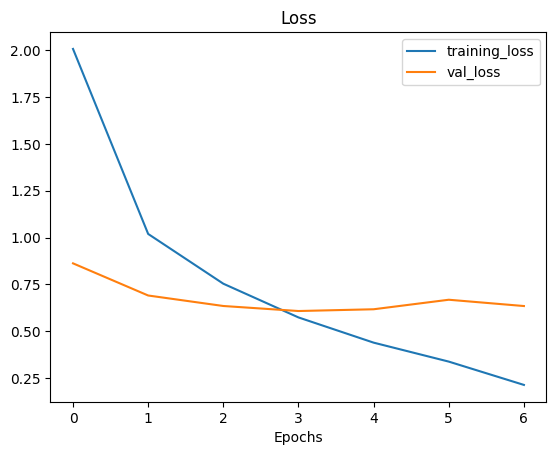

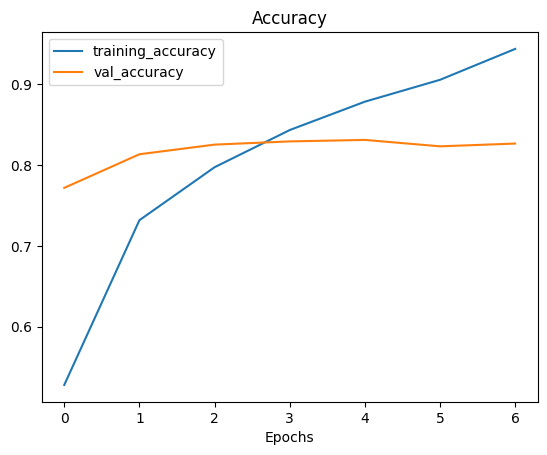

In [47]:
plot_loss_curves(history_fine_tune_unfrozen_base_model)

In [48]:
saved_model.save('saved_models/fine_tune_unfrozen_base_model.keras')

In [ ]:
from tensor